<div style="
    background-color:#c63d32;
    color:white;
    padding:18px 20px;
    border-radius:10px;
    font-size:26px;
    font-weight:600;
    text-align:center;
    margin-bottom:15px;
">
Supermarket Sales: Analysis and Total Sales Prediction Per Transaction
</div>

### <span style="font-size:18px;">🛒 <strong>Analysis and Prediction of Total Sales Per Transaction</strong></span>

**Author:** *Ibrahim Munirudeen Oshone*


In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet, Ridge

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor


from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()



import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
np.random.seed(42)

<div style="
    background-color:#c63d32;
    color:white;
    padding:18px 20px;
    border-radius:10px;
    font-size:26px;
    font-weight:600;
    text-align:center;
    margin-bottom:15px;
">
    Introduction
</div>

# Introduction <a class="anchor" id="Introduction"></a>

This project will analyze data gathered from a supermarket sales in order to discover trends, relationships, and indentify patterns that affect total sales . 

The goal of the first phase of this project is to analyze the data. More specifically, it will look at the following business questions:
    
* Which type of customer spends more on average?
* Which product line produces the highest spending?
* What day of the week produces the highest transaction and high-value transactions?
* What time of the day produce high value transactions?
* Which branch yield high and low transaction totals?


The goal of the second phase of this project is to build a model to forecast sales per transaction





<div style="
    background-color:#c63d32;
    color:white;
    padding:18px 20px;
    border-radius:10px;
    font-size:26px;
    font-weight:600;
    text-align:center;
    margin-bottom:15px;
">
Data description
</div>

 # Data description <a class="anchor" id="Description"></a>

Supermarket Sales Data: This dataset records individual transactions from a supermarket chain in Myanmar, with detailed attributes for each sale. The data includes the following columns:

 * __Invoice ID__: Unique identifier for each transaction  
 * __Branch__: Supermarket branch location (e.g., Yangon, Mandalay)  
 * __City__: City in which the supermarket branch is located  
 * __Customer Type__: 'Member' or 'Normal'  
 * __Gender__: Gender of the customer  
 * __Product Line__: Product category (e.g., Health & Beauty, Electronic Accessories, Home & Lifestyle)  
 * __Unit Price__: Price per unit of the product  
 * __Quantity__: Number of items purchased  
 * __Tax 5%__: Calculated tax amount on the transaction at a 5% rate  
 * __Total__: Total amount for the transaction including tax  
 * __Date__: Date of the transaction  
 * __Time__: Time of the transaction  
 * __Payment__: Payment method used (e.g., Cash, Ewallet, Credit card)  
 * __COGS__: Cost of goods sold, representing the raw cost of the products  
 * __Gross Margin Percentage__: Fixed percentage of profit for each sale (4.7619%)  
 * __Gross Income__: Profit earned from the transaction  
 * __Rating__: Customer satisfaction rating (out of 10)  


In [5]:
#load dataset
df = pd.read_csv("data/Supermarket.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
# View Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
#Statistical summary of numerical columns in our dataset
df.describe()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [8]:
# Describe of categorical columns
df.select_dtypes("object").describe()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,Alex,Yangon,Member,Female,Fashion accessories,2/7/2019,7:48:00 PM,Ewallet
freq,1,340,340,565,571,178,20,7,345


In [9]:
len(df.columns)

17

Initial data exploration reveals the following key points:

- 🧮 **Observations**: The dataset consists of 1,000 rows and 17 columns.  
- ⚠️ **Missing Values**: No missing values are present in the dataset.  
- 📊 **Column Types**: The dataset includes a mix of floats and objects.  
- 💰 **Price**: The highest price per unit is 10.8, while the highest is about 99.96.  
- 🏪 **Store branches**: There are 3 store branches across 3 cities in the dataset.  
- 🔢 **Product**: The dataset contains 6 product lines.  
- 🌍 **Payment Method**: 3 payment methods were used across all transactions.  


<div style="
    background-color:#c63d32;
    color:white;
    padding:18px 20px;
    border-radius:10px;
    font-size:26px;
    font-weight:600;
    text-align:center;
    margin-bottom:15px;
">
Data Preparation
</div>
    
# Data Preparation <a class="anchor" id="Preparation"></a>


In [12]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6


In [13]:
# Check for duplicates
df.duplicated().sum()

0

In [14]:
categorical_cols = ["Branch", "City", "Customer type", "Gender", "Product line", "Payment"]

for col in categorical_cols:
    print(f"{col}: {df[col].unique()}\n")

Branch: ['Alex' 'Giza' 'Cairo']

City: ['Yangon' 'Naypyitaw' 'Mandalay']

Customer type: ['Member' 'Normal']

Gender: ['Female' 'Male']

Product line: ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']

Payment: ['Ewallet' 'Cash' 'Credit card']



# Feature Enginnering <a class="anchor" id="FE"></a>


In [16]:
# Convert Date to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Extract Month
df["Year"] = df["Date"].dt.year

# Extract Month
df["Month"] = df["Date"].dt.month_name()

# Extract Day of Week as names
df["DayOfWeek"] = df["Date"].dt.day_name()

# Extract Hour from Time
df["Hour"] = pd.to_datetime(df["Time"]).dt.hour

In [17]:
# Define a function for time of day
def time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

# Apply function to create new column
df["TimeOfDay"] = df["Hour"].apply(time_of_day)


In [18]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,...,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,DayOfWeek,Hour,TimeOfDay
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,2019,January,Saturday,13,Afternoon
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,2019,March,Friday,10,Morning


In [19]:
Columns_to_drop = ["Invoice ID", "Date", "Time"]
df.drop(columns= Columns_to_drop, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Sales                    1000 non-null   float64
 9   Payment                  1000 non-null   object 
 10  cogs                     1000 non-null   float64
 11  gross margin percentage  1000 non-null   float64
 12  gross income             1000 non-null   float64
 13  Rating                   1000 non-null   float64
 14  Year                     

In [20]:
num_cols = ["Unit price", "Quantity", "Tax 5%", "Sales", "cogs",	"gross income",	"Rating", "Hour"]
cat_cols = ["Branch", "City", "Customer type",	"Gender", "Product line", "Payment", "DayOfWeek", "TimeOfDay"]

df[num_cols] = df[num_cols].round(2)
df.head(2)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,DayOfWeek,Hour,TimeOfDay
0,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,Ewallet,522.83,4.761905,26.14,9.1,2019,January,Saturday,13,Afternoon
1,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,Cash,76.40,4.761905,3.82,9.6,2019,March,Friday,10,Morning


### Feature Engineering Summary

- 📅 **Date Features**: Extracted **Day**, **Month**, and **Year** from the `Date` column.  
- ⏰ **Time Features**: Extracted **Hour** from the `Time` column.  
- 🕒 **Time of Day**: Created `TimeOfDay` feature with categories: "Morning", "Afternoon", "Evening", and "Night".  
- 🗑️ **Dropped Columns**: Removed `Invoice ID`, `Date`, and `Time` columns as they are no longer needed.
- 
- 🧮 **Resulting Features**: The dataset now includes both original and derived features suitable for analysis and machine learning.


<div style="
    background-color:#c63d32;
    color:white;
    padding:18px 20px;
    border-radius:10px;
    font-size:26px;
    font-weight:600;
    text-align:center;
    margin-bottom:15px;
">
Exploratory Data Analysis
</div>
    
# Exploratory Data Analysis <a class="anchor" id="EDA"></a>


## Count Distribution Across Variables<a class="anchor" id="univariant"></a>


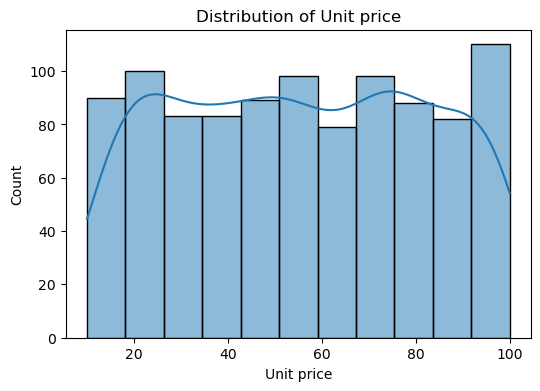

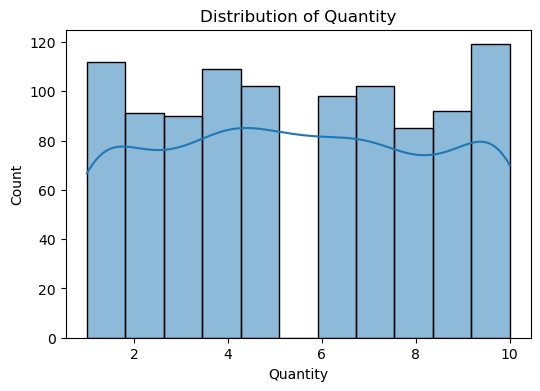

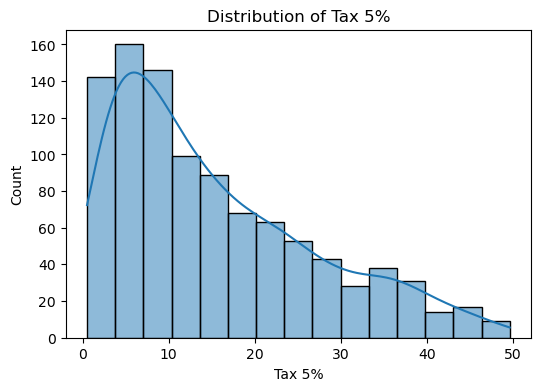

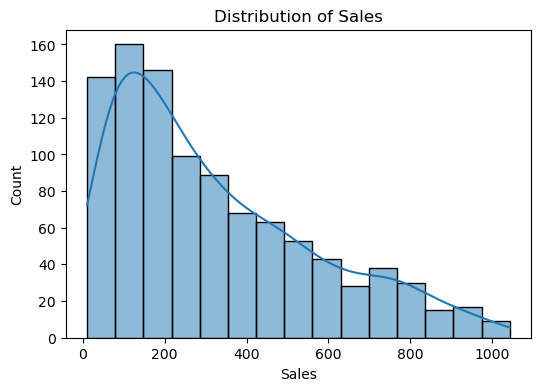

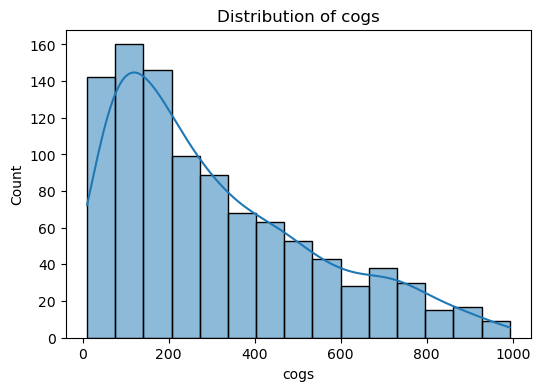

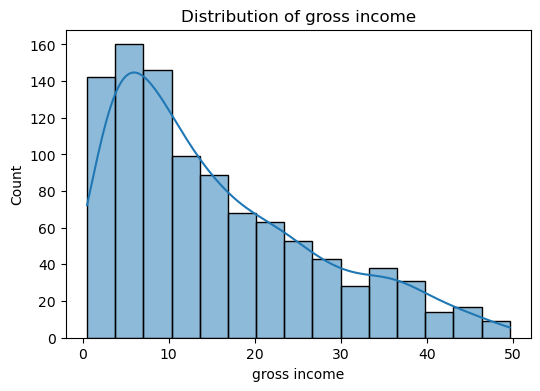

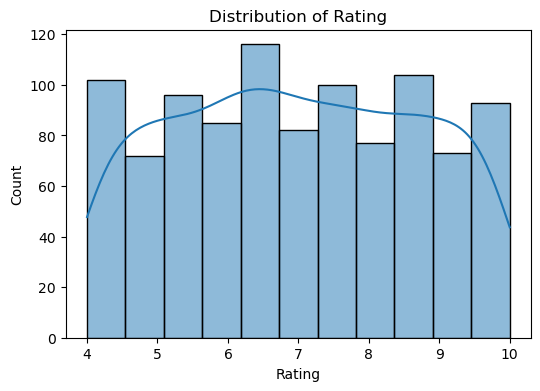

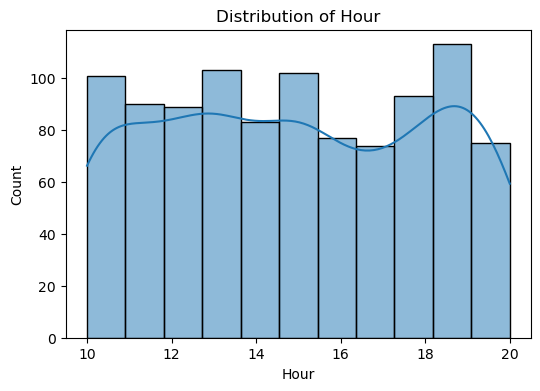

In [24]:
#Distribution of all numerical clomns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


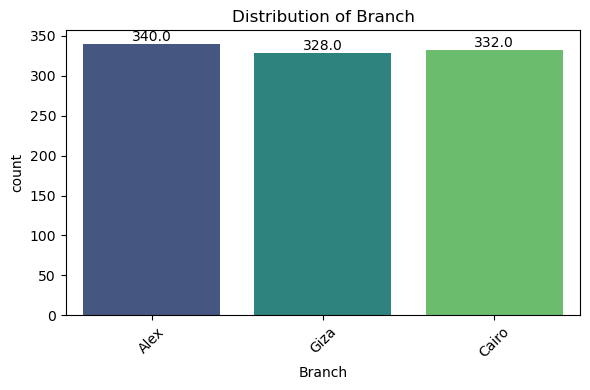

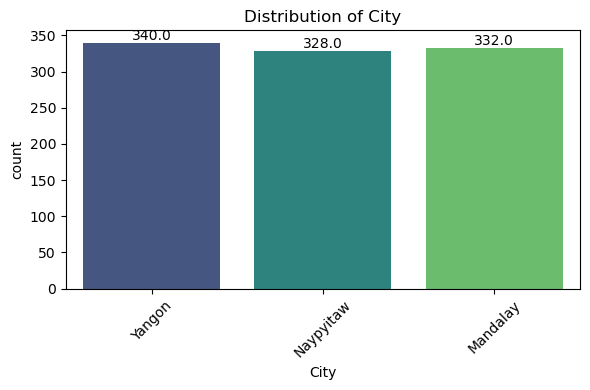

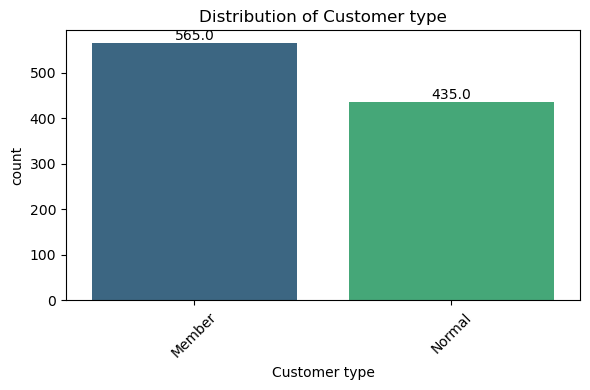

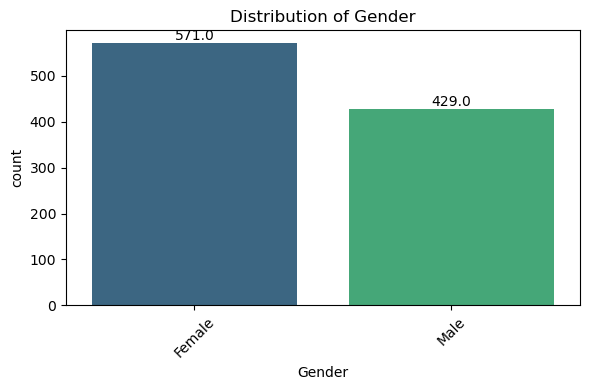

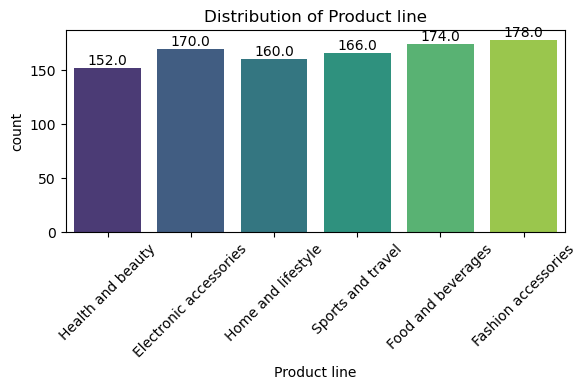

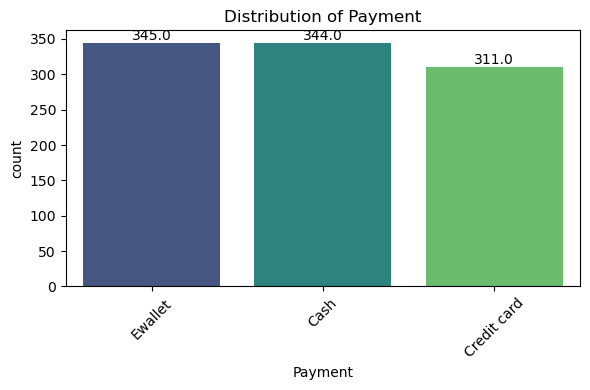

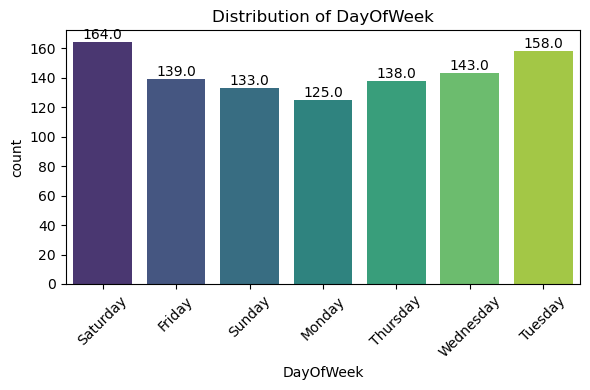

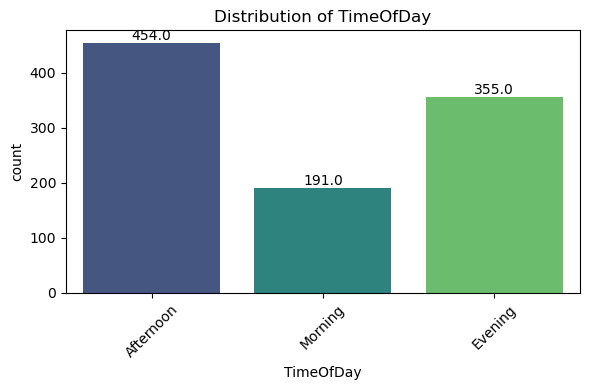

In [25]:
#Distribution of all numerical clomns
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(data=df, x=col, palette="viridis")  # vertical + colored

    # Add count labels
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10)

    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Bi and Multi variant Analysis<a class="anchor" id="bivariant"></a>


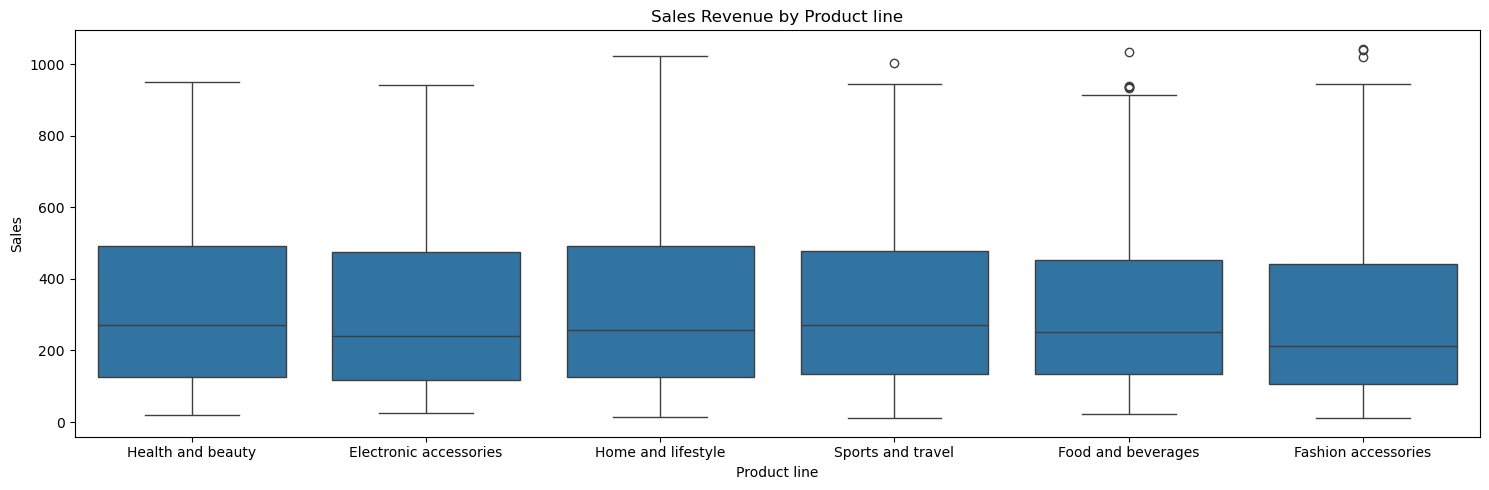

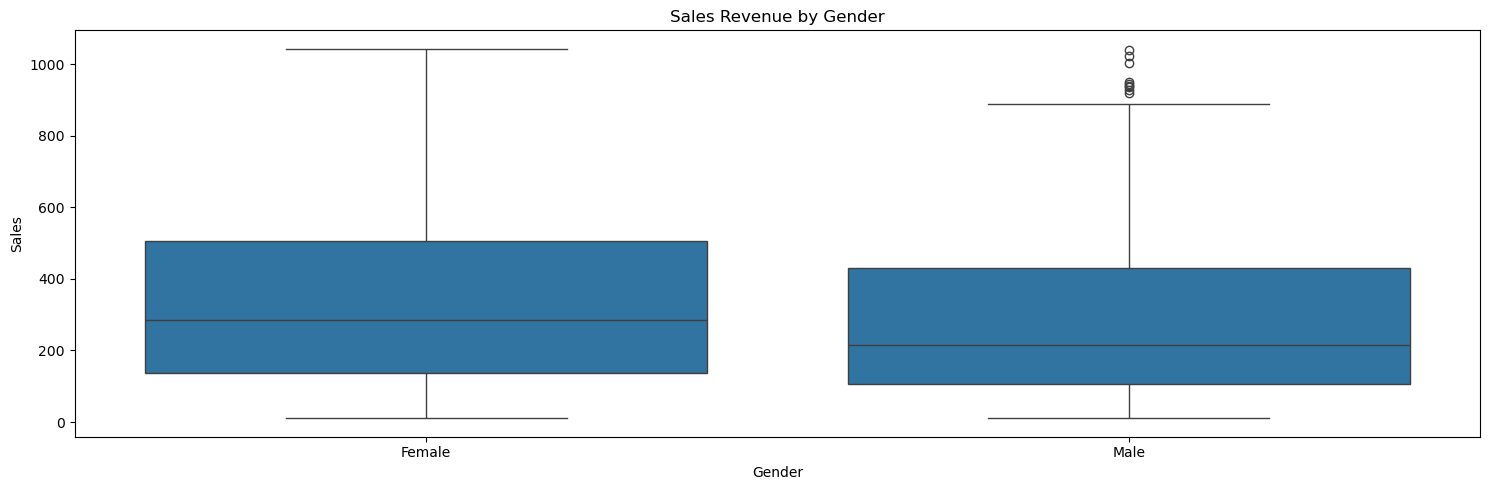

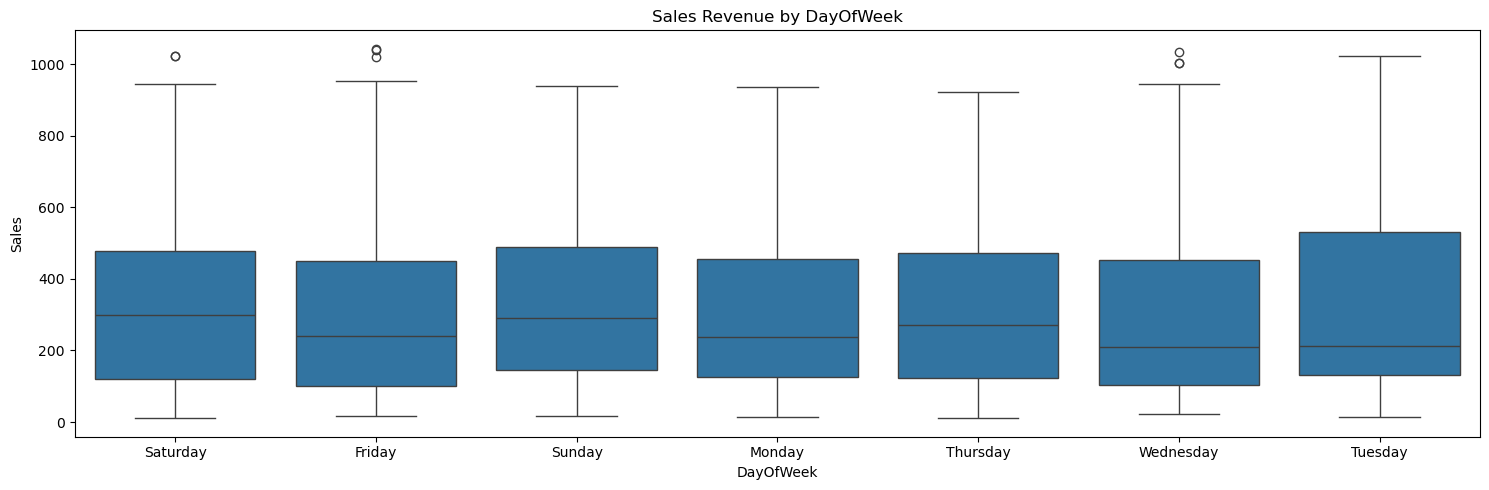

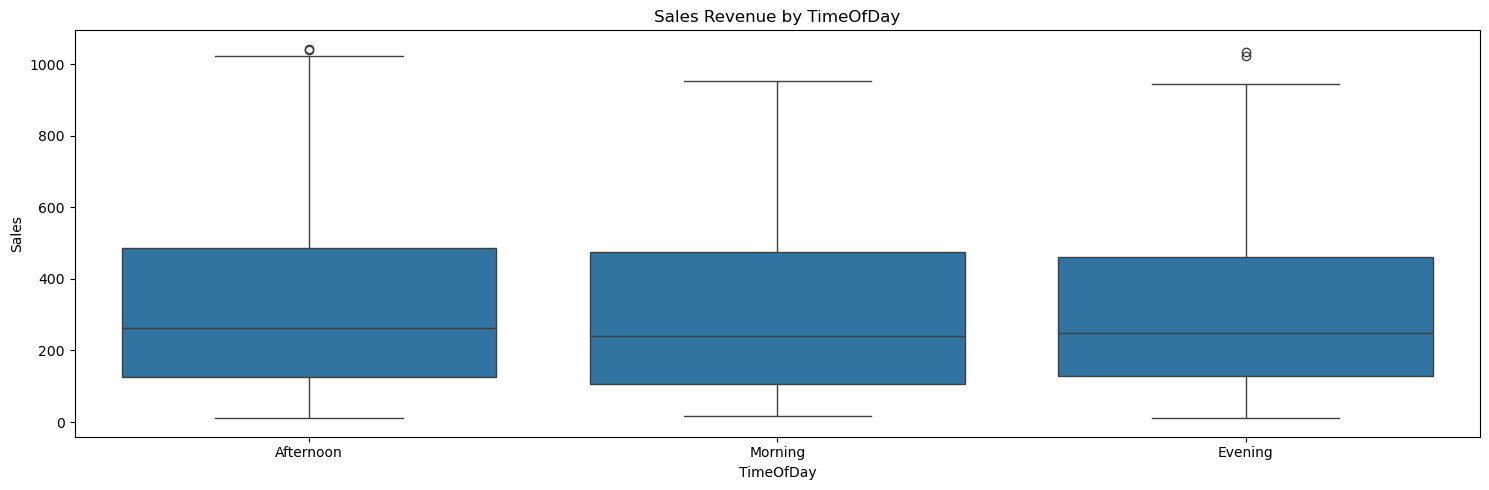

In [27]:
columns_to_plot = ['Product line', 'Gender', 'DayOfWeek', 'TimeOfDay']

# Plot box plots
for column in columns_to_plot:
   
    plt.figure(figsize=(15, 5))
    sns.boxplot(data=df, x=column, y='Sales')
    plt.title(f'Sales Revenue by {column}')
    
    plt.tight_layout()
    plt.show()


### Average Spend for each Customer type


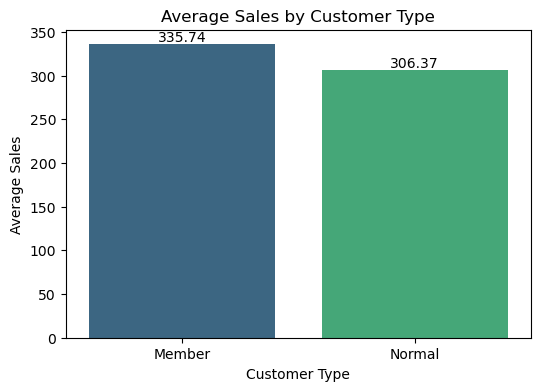

In [29]:
avg_sales = df.groupby("Customer type")["Sales"].mean()

# Convert Series to DataFrame so seaborn can read it clearly
avg_sales = avg_sales.reset_index()

# Plot
plt.figure(figsize=(6,4))
ax = sns.barplot(data=avg_sales, x="Customer type", y="Sales", palette="viridis")

# Add the values on top of bars
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f'{value:.2f}',
                (p.get_x() + p.get_width() / 2, value),
                ha='center', va='bottom', fontsize=10)

# Add title and labels
plt.title("Average Sales by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Average Sales")

plt.show()

### Product line with the highest total sales


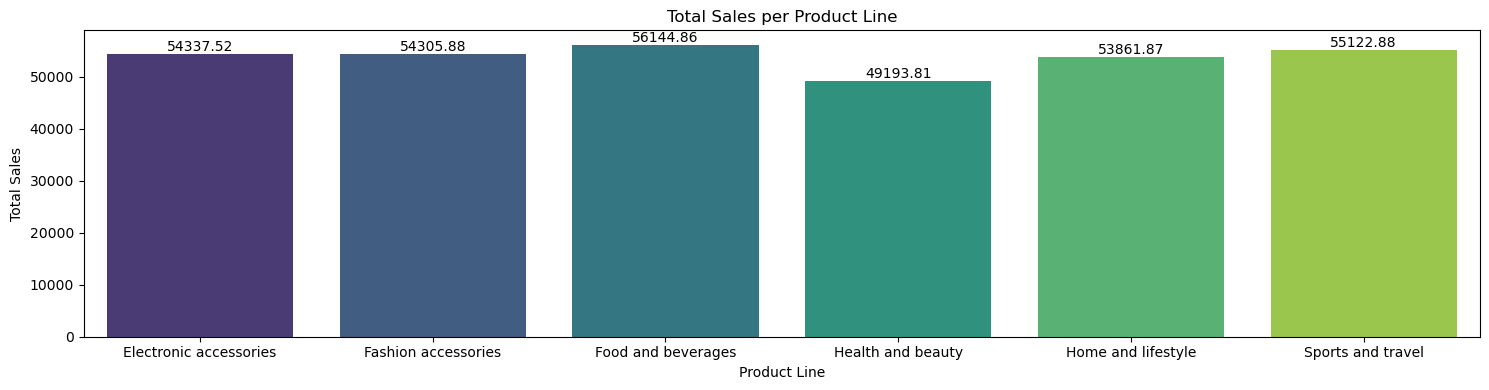

In [31]:
total_sales = df.groupby("Product line")["Sales"].sum()

# Convert Series to DataFrame so seaborn can read it clearly
total_sales = total_sales.reset_index()

# Plot
plt.figure(figsize=(15,4))
ax = sns.barplot(data=total_sales, x="Product line", y="Sales", palette="viridis")

# Add the values on top of bars
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f'{value:.2f}',
                (p.get_x() + p.get_width() / 2, value),
                ha='center', va='bottom', fontsize=10)

# Add title and labels
plt.title("Total Sales per Product Line")
plt.xlabel("Product Line")
plt.ylabel("Total Sales")

plt.tight_layout()
plt.show()

### average amount the different customer type spent on each product line

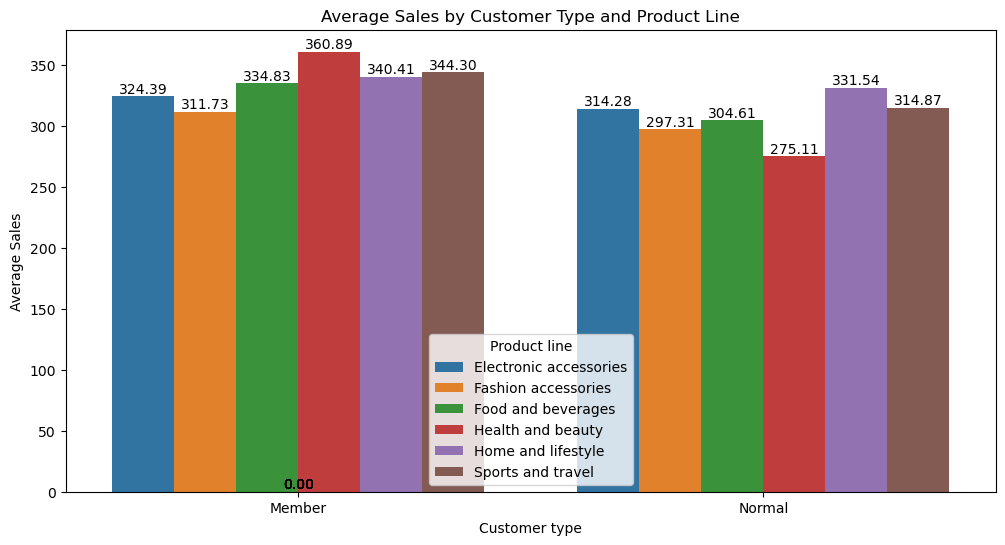

In [33]:
avg_sales_per_ct_pl = df.groupby(["Customer type","Product line"])["Sales"].mean().reset_index()

plt.figure(figsize=(12,6))
ax = sns.barplot(data=avg_sales_per_ct_pl, 
                 x="Customer type", 
                 y="Sales", 
                 hue="Product line")

# Add value labels
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f"{value:.2f}",
                (p.get_x() + p.get_width() / 2, value),
                ha='center', va='bottom', fontsize=10)

plt.title("Average Sales by Customer Type and Product Line")
plt.ylabel("Average Sales")
plt.xticks(rotation=0)

plt.show()


### average amount the different gender spent on each product line

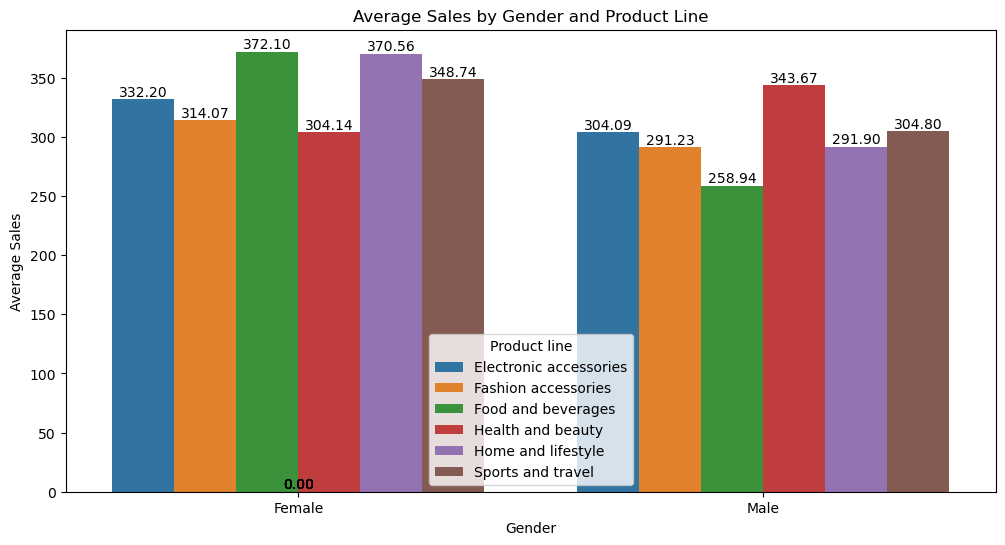

In [35]:
avg_sales_per_gd_pl = df.groupby(["Gender","Product line"])["Sales"].mean().reset_index()

plt.figure(figsize=(12,6))
ax = sns.barplot(data=avg_sales_per_gd_pl, x="Gender", y="Sales", hue="Product line")

# Add the value labels
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f"{value:.2f}",
                (p.get_x() + p.get_width() / 2, value),
                ha="center", va="bottom", fontsize=10)

plt.title("Average Sales by Gender and Product Line")
plt.ylabel("Average Sales")
plt.xticks(rotation=0)
plt.show()


### What day of the week produces the high value transactions

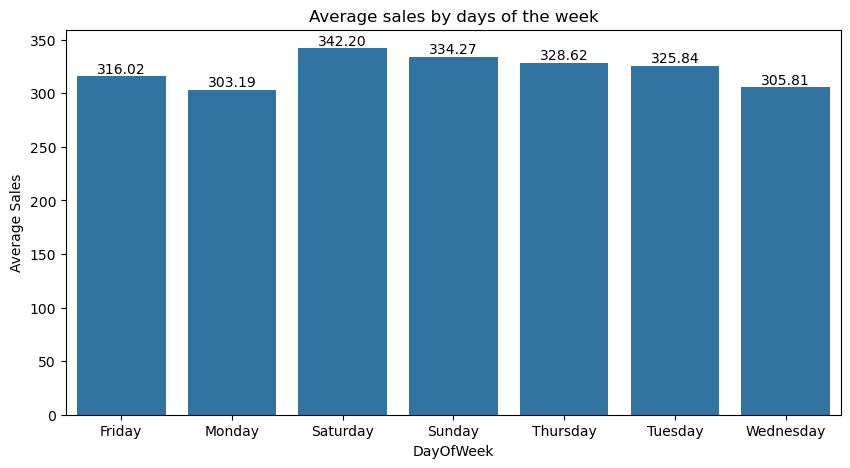

In [37]:
avg_sales_per_dayofweek = df.groupby(["DayOfWeek"])["Sales"].mean().reset_index()

plt.figure(figsize=(10,5))
ax = sns.barplot(data=avg_sales_per_dayofweek, 
                 x="DayOfWeek", 
                 y="Sales")

# Add value labels
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f"{value:.2f}",
                (p.get_x() + p.get_width() / 2, value),
                ha='center', va='bottom', fontsize=10)

plt.title("Average sales by days of the week")
plt.ylabel("Average Sales")
plt.xticks(rotation=0)

plt.show()


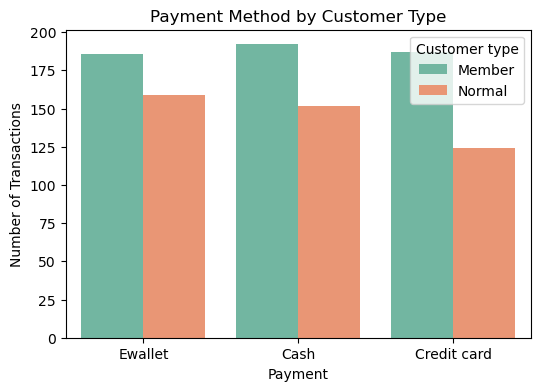

In [38]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Payment", hue="Customer type", palette="Set2")
plt.title("Payment Method by Customer Type")
plt.ylabel("Number of Transactions")
plt.show()

### Total Sales by DayOfWeek × Hour (High-Sales Time Blocks)

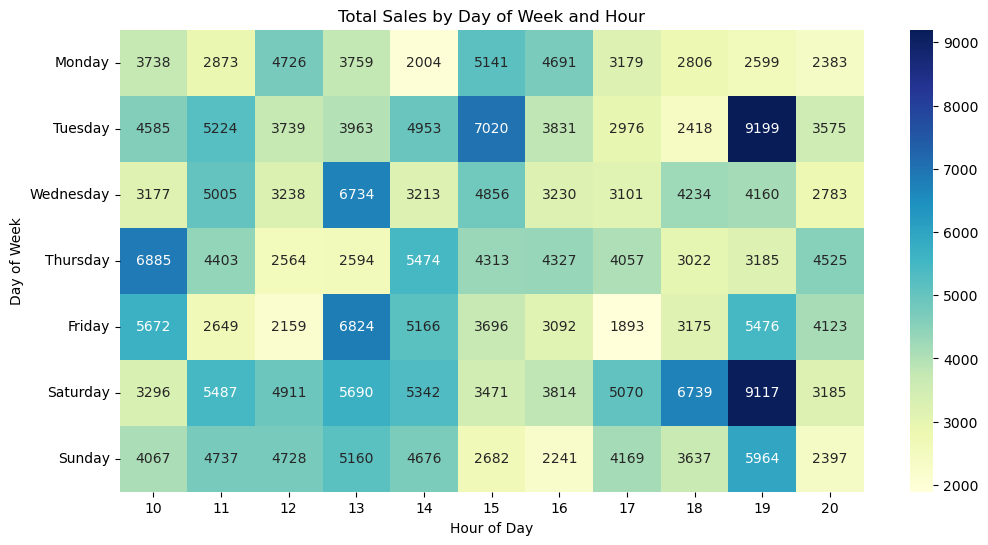

In [40]:

#Pivot_table: rows = DayOfWeek, columns = Hour, values = sum of Total Sales
sales_time = df.pivot_table(
    index="DayOfWeek",
    columns="Hour",
    values="Sales",
    aggfunc="sum"
)

# Sort DayOfWeek for better visualization (Monday → Sunday)
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sales_time = sales_time.reindex(days_order)

# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(sales_time, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Total Sales by Day of Week and Hour")
plt.ylabel("Day of Week")
plt.xlabel("Hour of Day")
plt.show()


### Branch Performance by DayOfWeek or TimeOfDay

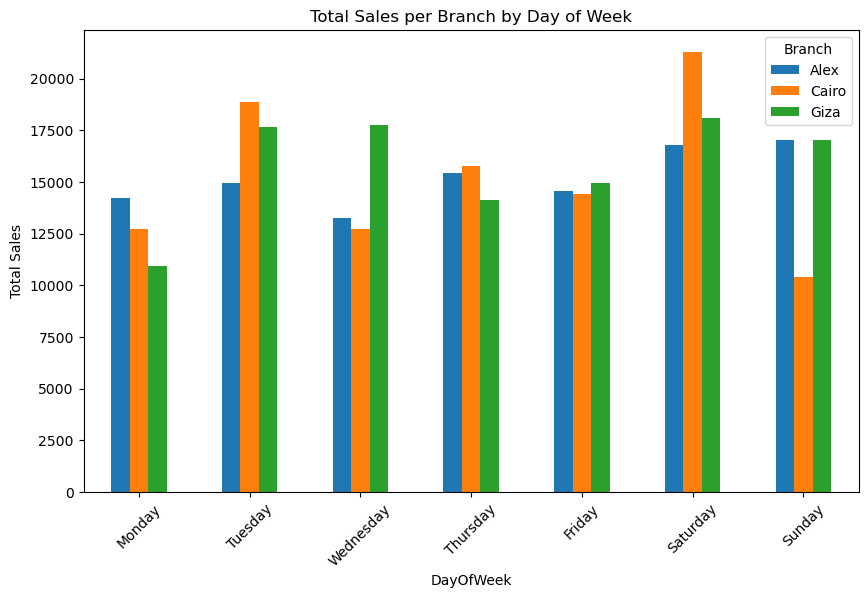

In [42]:
branch_day = df.pivot_table(
    index="DayOfWeek",
    columns="Branch",
    values="Sales",
    aggfunc="sum"
).reindex(days_order)

branch_day.plot(kind="bar", figsize=(10,6))
plt.title("Total Sales per Branch by Day of Week")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


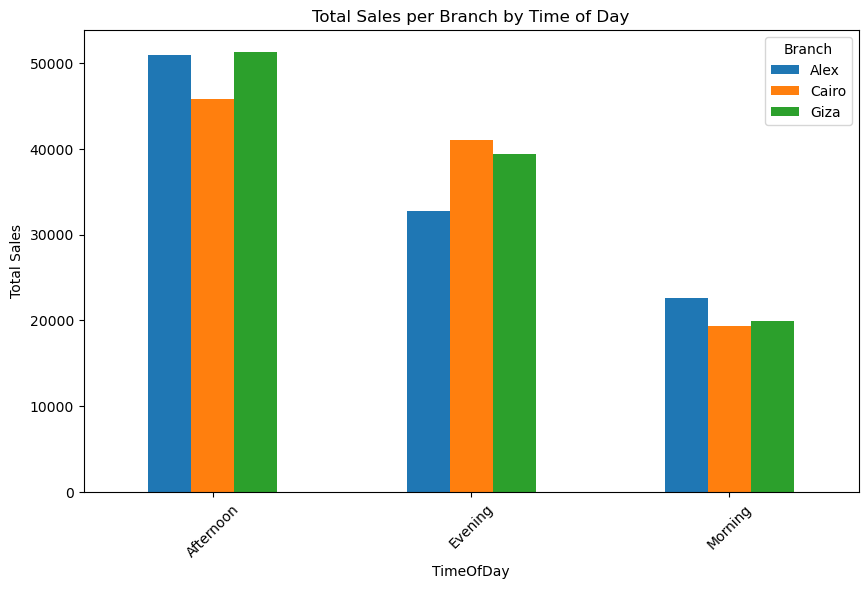

In [43]:
branch_day = df.pivot_table(
    index="TimeOfDay",
    columns="Branch",
    values="Sales",
    aggfunc="sum"
)

branch_day.plot(kind="bar", figsize=(10,6))
plt.title("Total Sales per Branch by Time of Day")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


### Correlation

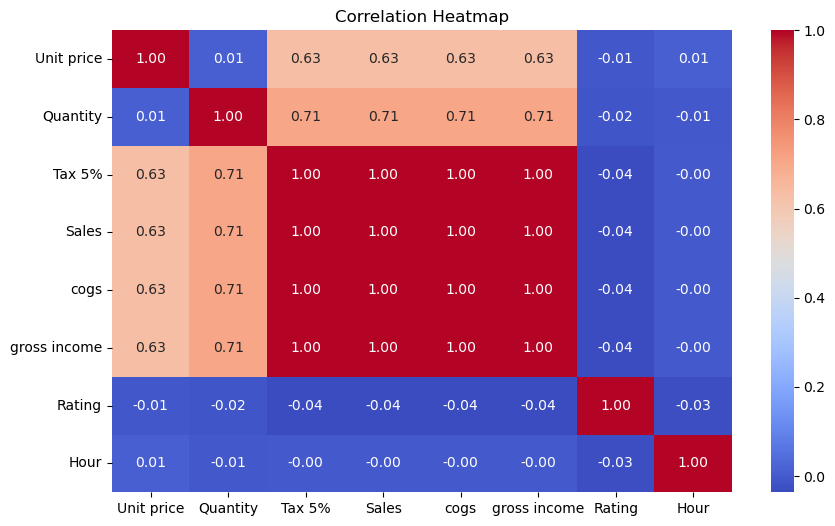

In [45]:
#correlatio heatmap of 
corr_matrix = df.drop(columns=cat_cols + ["Month", "Year", "gross margin percentage"]).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### Exploratory Data Analysis (EDA) Summary

- 💳 **Customer Spending**:  
  - **Members** spend more on average: 335.37  
  - **Normal customers** spend slightly less on average: 306.37  


- 🛒 **Product Line Performance**:  
  - **Food & Beverage** produces the highest total spending among all product lines.  


- 📅 **Day of Week Analysis**:  
  - **Weekends**, especially **Saturday**, have the highest number of transactions and high-value transactions.  


- ⏰ **Time of Day Analysis**:  
  - Overall, **Afternoon** has the highest total sales.  
  - Branch-specific peaks:  
    - **Alex**: Afternoon  
    - **Giza**: Afternoon  
    - **Cairo**: Afternoon  
 although in the evening Caira records the highest total sales
- 🏪 **Branch Performance**:  
  - Total transaction averages per branch:  
    - **Alex**: 340  
    - **Cairo**: 332  
    - **Giza**: 328  


<div style="
    background-color:#c63d32;
    color:white;
    padding:18px 20px;
    border-radius:10px;
    font-size:26px;
    font-weight:600;
    text-align:center;
    margin-bottom:15px;
">
Modeling
</div>
    
# Modeling <a class="anchor" id="modeling"></a>


### Model is developed to predict future total sales per transaction (we dont know how may items the user will buy )

#### I built Models using Ensemble models like RandomForest, Gradient Boosting, Bagging Regressor and XGBRegressor
#### I also tried Linear Models including Linear Regression, Ridge Regression, and SGD
#### Finally, i used a deep learning model
* __I dropped leaky features as we can only use features know during predictions__
*   ##### they include: quantity and tax
* __When leaky featues are added which give gives the model a formula  directly, the model accuracy increases to over 99%__
* __without the leaky features, our best model are Dence neural network which achieved an R2 score of 45.46% followed by Linear Rigression with R2 of 45.35 on the test data__


In [49]:
cat_cols = [
    'Branch', 
    'Customer type',
    'Gender',
    'Product line',
    'Payment',
    'Month', #January to decenber
    'DayOfWeek', #Monday - sunday
    'TimeOfDay' # Morning, Afternoon, Evening, Night
    
]
num_cols = ['Unit price']

In [50]:
df_model = df.copy()

# Label encode each categorical column
for col in cat_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])


In [51]:
# Split data into features (X) and target (y)
target= "Sales"
features = ['Branch', #city not included as there is only one branch per city
            'Customer type',
            'Gender',
            'Product line',
            'Unit price',
            'Payment',
            'Month',
            'DayOfWeek',
            'TimeOfDay']

X= df_model[features]
y = df_model[target]

print(X.shape)
print(y.shape)

(1000, 9)
(1000,)


In [52]:
#split dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(y_train.shape)
y_test.head()

(800, 9)
(800,)


521    523.97
737    616.98
740    408.73
660    135.36
411     45.93
Name: Sales, dtype: float64

In [53]:
#instatiate models

rf_model = RandomForestRegressor()
 

gb_model = GradientBoostingRegressor()


bg_model = BaggingRegressor()


xgb_model = XGBRegressor()


In [54]:
kf = KFold(n_splits=4, shuffle=True, random_state=42)

models = [rf_model, gb_model, bg_model, xgb_model]
model_names = ["Random Forest", "Gradient Boosting", "Bagging", "XGBoost"]

for name, model in zip(model_names, models):
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="r2")
    print(f"{name} Mean R²: {np.mean(scores):.4f} ± {np.std(scores):.4f}")


Random Forest Mean R²: 0.3400 ± 0.0233
Gradient Boosting Mean R²: 0.3193 ± 0.0333
Bagging Mean R²: 0.2958 ± 0.0282
XGBoost Mean R²: 0.1796 ± 0.0668


Best params for Random Forest: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20}
Random Forest Model:
Test R²: 0.4004
Test RMSE: 197.5089

Best params for Bagging Regressor: {'n_estimators': 100, 'max_samples': 0.5, 'max_features': 0.7}
Bagging Regressor Model:
Test R²: 0.3627
Test RMSE: 203.6256

Best params for Gradient Boosting: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01}
Gradient Boosting Model:
Test R²: 0.4220
Test RMSE: 193.9159

Best params for XGBoost: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}
XGBoost Model:
Test R²: 0.4260
Test RMSE: 193.2380



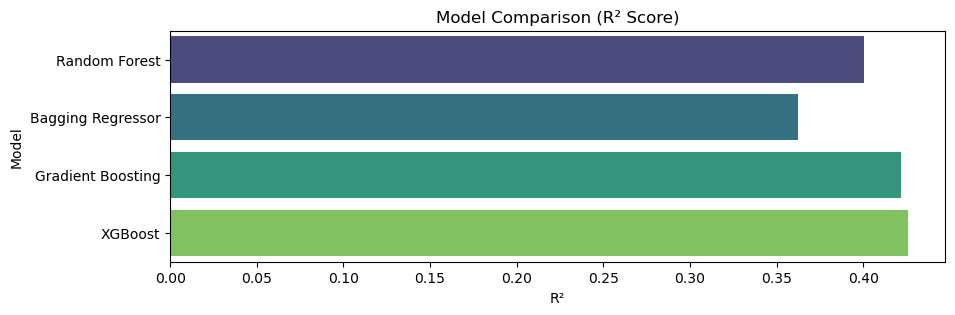

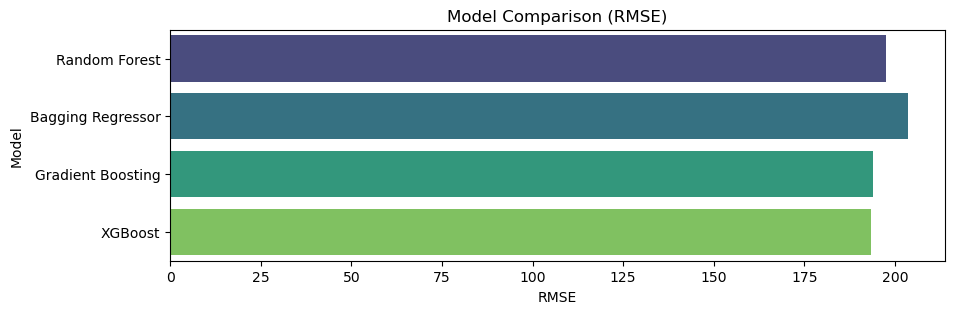

In [55]:
#  Hyperparameter grids
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Bagging Regressor': {
        'n_estimators': [10, 50, 100],
        'max_samples': [0.5, 0.7, 1.0],
        'max_features': [0.5, 0.7, 1.0]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7]
    }
}

#  Models
models = {
    'Random Forest': rf_model,
    'Bagging Regressor': bg_model,
    'Gradient Boosting': gb_model,
    'XGBoost': xgb_model
}

results = []


# Evaluation with RandomizedSearchCV

for name, model in models.items():
    param_grid = param_grids.get(name, None)
    
    if param_grid:
        search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=3, scoring='r2',
                                    random_state=42, n_jobs=-1)
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
        print(f"Best params for {name}: {search.best_params_}")
    else:
        best_model = model
        best_model.fit(X_train, y_train)
    
    # Predictions on test set
    y_pred = best_model.predict(X_test)
    
    # Compute metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"{name} Model:")
    print(f"Test R²: {r2:.4f}")
    print(f"Test RMSE: {rmse:.4f}\n")
    
    # Store results
    results.append({'Model': name, 'R²': r2, 'RMSE': rmse})

# Visualize results

results_df = pd.DataFrame(results)
palette = sns.color_palette("viridis", len(results_df))

plt.figure(figsize=(10, 3))
sns.barplot(x='R²', y='Model', data=results_df, palette=palette)
plt.title('Model Comparison (R² Score)')
plt.show()

plt.figure(figsize=(10, 3))
sns.barplot(x='RMSE', y='Model', data=results_df, palette=palette)
plt.title('Model Comparison (RMSE)')
plt.show()

### Linear Model 

In [57]:
df_lmodel = df.copy()


In [58]:
# Split data into features (X) and target (y)
target= "Sales"
features = ['Branch', #city not included as there is only one branch per city
            'Customer type',
            'Gender',
            'Product line',
            'Unit price',
            'Payment',
            'Month',
            'DayOfWeek',
            'TimeOfDay']

X_l = df_lmodel[features]
y_l = df_lmodel[target]

print(X_l.shape)
print(y_l.shape)

(1000, 9)
(1000,)


In [59]:
#split dataset into training and testing data
X_l_train, X_l_test, y_l_train, y_l_test = train_test_split(X_l, y_l, test_size = 0.2, random_state = 42)
print(X_l_train.shape)
print(y_l_train.shape)
X_l_train.head()

(800, 9)
(800,)


,Branch,Customer type,Gender,Product line,Unit price,Payment,Month,DayOfWeek,TimeOfDay
29,Alex,Member,Female,Health and beauty,24.89,Cash,March,Friday,Afternoon
535,Giza,Normal,Male,Home and lifestyle,16.67,Ewallet,February,Thursday,Morning
695,Alex,Member,Female,Home and lifestyle,87.37,Cash,January,Tuesday,Evening
557,Giza,Member,Female,Food and beverages,98.52,Ewallet,January,Wednesday,Evening
836,Alex,Member,Male,Fashion accessories,38.54,Ewallet,January,Wednesday,Afternoon


In [60]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ]
)


Linear Regression 5-Fold CV R²: 0.3579 ± 0.0425
Linear Regression Test R²: 0.4535, RMSE: 188.5527

Ridge Regression 5-Fold CV R²: 0.3585 ± 0.0419
Ridge Regression Test R²: 0.4533, RMSE: 188.5913

SGD Regressor 5-Fold CV R²: 0.2798 ± 0.0452
SGD Regressor Test R²: 0.3531, RMSE: 205.1531



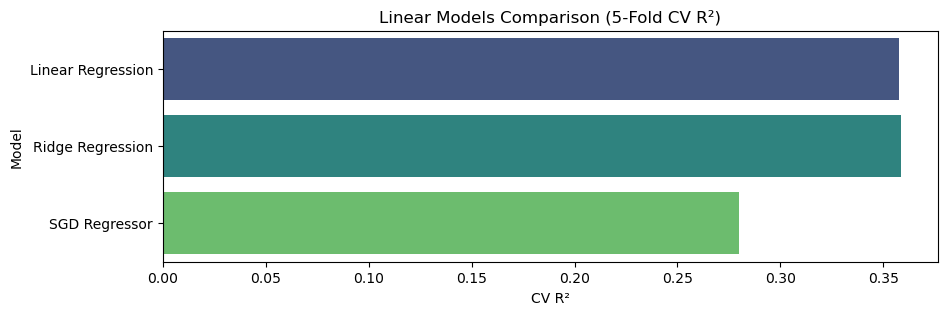

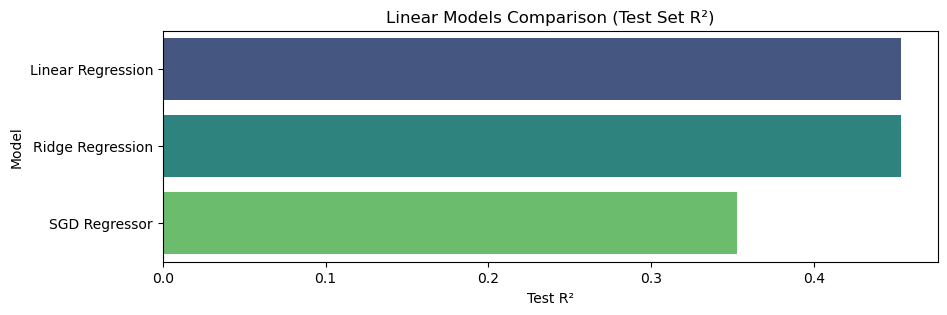

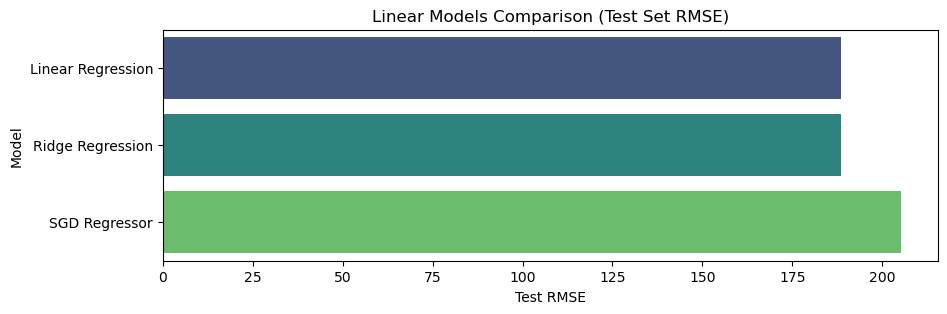

In [61]:
models = {
    'Linear Regression': Pipeline([('preprocessor', preprocessor), ('lr', LinearRegression())]),
    'Ridge Regression': Pipeline([('preprocessor', preprocessor), ('ridge', Ridge(alpha=1.0))]),
    'SGD Regressor': Pipeline([('preprocessor', preprocessor), ('sgd', SGDRegressor(max_iter=1000, tol=1e-3, random_state=42))])
}

results = []

# Cross-validation first

for name, model in models.items():
    cv_scores = cross_val_score(model, X_l_train, y_l_train, cv=5, scoring='r2')
    print(f"{name} 5-Fold CV R²: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    
    # Train on full training set for final test evaluation
    model.fit(X_l_train, y_train)
    y_pred = model.predict(X_l_test)
    test_r2 = r2_score(y_l_test, y_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"{name} Test R²: {test_r2:.4f}, RMSE: {test_rmse:.4f}\n")
    
    results.append({'Model': name, 'Test R²': test_r2, 'Test RMSE': test_rmse, 'CV R²': cv_scores.mean()})

# Visualize results

results_df = pd.DataFrame(results)
palette = sns.color_palette("viridis", len(results_df))

plt.figure(figsize=(10,3))
sns.barplot(x='CV R²', y='Model', data=results_df, palette=palette)
plt.title('Linear Models Comparison (5-Fold CV R²)')
plt.show()

plt.figure(figsize=(10,3))
sns.barplot(x='Test R²', y='Model', data=results_df, palette=palette)
plt.title('Linear Models Comparison (Test Set R²)')
plt.show()

plt.figure(figsize=(10,3))
sns.barplot(x='Test RMSE', y='Model', data=results_df, palette=palette)
plt.title('Linear Models Comparison (Test Set RMSE)')
plt.show()


## Deep Learning Model

In [101]:
## Neural Network wth TensorFlow

# Define a Sequential model
model = Sequential([
    Dense(units=50, activation='relu'),
    Dense(units=30, activation='relu'),
    Dense(units=1, activation='relu')             # Output layer with ReLU activation (suitable for regression non-negative tasks)
])

# Compile the model with Mean Squared Error loss function and train the model
model.compile(loss = MeanSquaredError())
model.fit(X_train, y_train, epochs=100)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 139854.4531 
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 111767.7188
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 83290.3516 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57153.5156 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41117.1758 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36762.3594 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36659.1641 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36635.4297 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36538.8438 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36629.3438
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36608.5352 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36585.5781 
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36510.1406 
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36460.6562 
E

In [103]:
y_pred = model.predict(X_test)

test_r2 = r2_score(y_test, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
print(f"Test R²: {test_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}\n")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Test R²: 0.4546
Test RMSE: 188.3702



<div style="
    background-color:#c63d32;
    color:white;
    padding:18px 20px;
    border-radius:10px;
    font-size:26px;
    font-weight:600;
    text-align:center;
    margin-bottom:15px;
">
Interpretation and Recommendation
</div>
    
# recomendation <a class="anchor" id="recomendation"></a>


# feature Importance using Linear Regression model

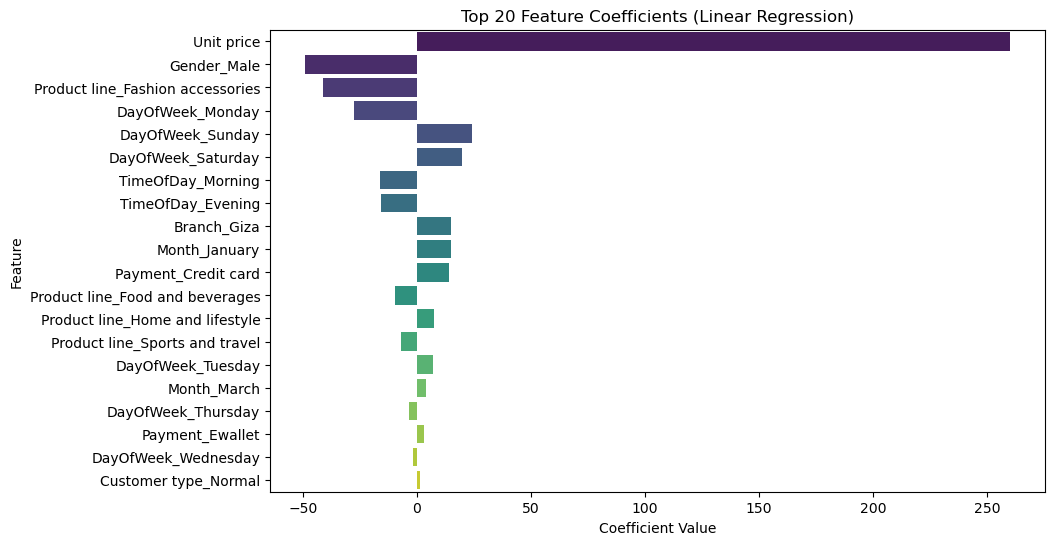

In [113]:
# Get the trained Linear Regression model
linear_model = models['Linear Regression']

# Extract numeric and categorical feature names
num_features = num_cols
cat_features = linear_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(cat_cols)

all_features = np.concatenate([num_features, cat_features])

# Get the coefficients
coefficients = linear_model.named_steps['lr'].coef_

# Create a DataFrame for visualization
coef_df = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': coefficients
})
# Sort by absolute value of coefficients to find top contributors
coef_df['abs_coef'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)

# Plot top 20 features
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(20), palette='viridis')
plt.title('Top 20 Feature Coefficients (Linear Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


# 📊 Linear Regression Interpretation & Business Insights

## 🧠 Model Interpretation (Plain Language)
The linear regression model shows that **Unit Price** is the strongest predictor of total sales, meaning higher-priced items generate significantly more revenue. **Weekend days** (especially Saturday and Sunday) are associated with increased sales, while **Monday** shows noticeably lower spending. Sales peak during the **Afternoon**, which consistently outperforms Morning and Evening across branches.  
Male customers tend to spend slightly less than female customers. Some product lines, like **Fashion Accessories**, contribute less to revenue, while others such as **Food & Beverages** contribute positively. The **Giza** branch shows slightly higher predicted revenue compared to the baseline, and purchases made with **credit cards** are linked to higher spending.


# 💡 Actionable Recommendations

## 1️⃣ Strengthen High-Sales Periods
- **Afternoon has the highest sales** across branches.  
  - Boost staffing levels, improve stock availability, and run time-based promotions.
- **Weekends (especially Saturday)** show high-value transactions.  
  - Launch weekend-only deals, loyalty boosters, or targeted marketing.

---

## 2️⃣ Improve Low-Sales Periods
- **Monday and Morning hours** show the weakest performance.  
  - Introduce Monday discounts, “Morning Happy Hour” offers, or bundled pricing.

---

## 3️⃣ Leverage High-Value Customer Segments
- **Members spend more** than normal customers.  
  - Promote membership sign-ups and enhance member-exclusive benefits.
- **Male customers spend slightly less**.  
  - Use targeted campaigns and offer promotions in categories males prefer (e.g., Electronics, Sports & Travel).

---

## 4️⃣ Optimize Product Line Strategy
- **Food & Beverages** performs strongly.  
  - Expand product variety and create bundle offers.
- **Fashion Accessories** underperforms in the model.  
  - Revisit pricing, visual merchandising, or run targeted promotions.

---

## 5️⃣ Apply Branch-Specific Strategies
- **Alex** has the highest average transaction value.  
  - Maintain strong service and inventory at this location.
- **Giza** contributes positively in the model.  
  - Support growth through local promotions.
- **Cairo** peaks in **Evening sales** (unique compared to other branches).  
  - Run evening-specific deals or events for Cairo customers.

---

## 6️⃣ Encourage High-Spend Payment Methods
- **Credit card users spend more**.  
  - Partner with banks to offer cashback days or exclusive rewards.

---

## 7️⃣ Pricing Strategy
- Since **Unit Price heavily influences revenue**, price adjustments can increase total sales.  
  - Apply strategic, data-driven price increases only where demand is strong.

---

# 🎯 Summary
This data reveals opportunities to:
- Maximize strong periods (Afternoon, Weekends)  
- Grow profitable customer segments (Members, Credit card users)  
- Improve weaker categories (Fashion Accessories)  
- Tailor branch-specific strategies (e.g., Cairo Evenings)  

These insights support revenue optimization, better marketing decisions, and operational improvements across branches.
